In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [14]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [15]:
df.isnull().sum()   # checked the empty cell

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [16]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [17]:
x = df.drop(columns = 'Avg_Credit_Limit')
y = df['Avg_Credit_Limit']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [30]:
x.head()

,Sl_No,Customer Key,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,2,1,1,0
1,2,38414,3,0,10,9
2,3,17341,7,1,3,4
3,4,40496,5,1,1,4
4,5,47437,6,0,12,3


# Linear Regression 

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
import numpy as np

In [38]:
r2_score(y_predict,y_test)

0.7510617084174138

In [40]:
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

C:\Users\Hp\AppData\Local\Temp\ipykernel_11528\1680242643.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11528\1680242643.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[cols])
C:\Users\Hp\AppData\Local\Temp\ipykernel_11528

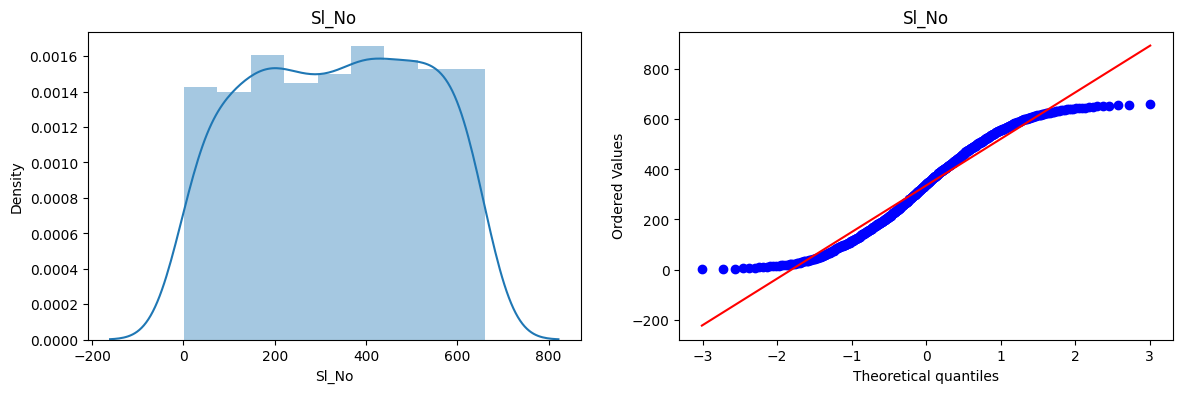

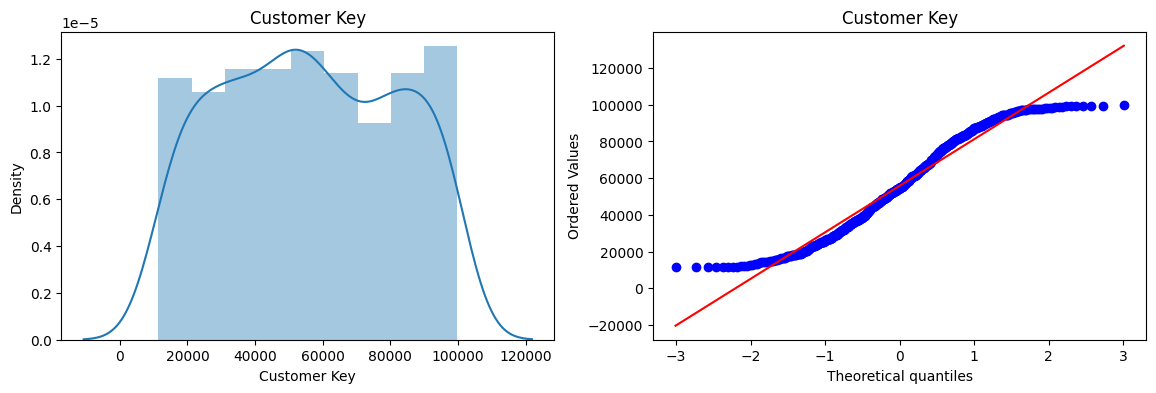

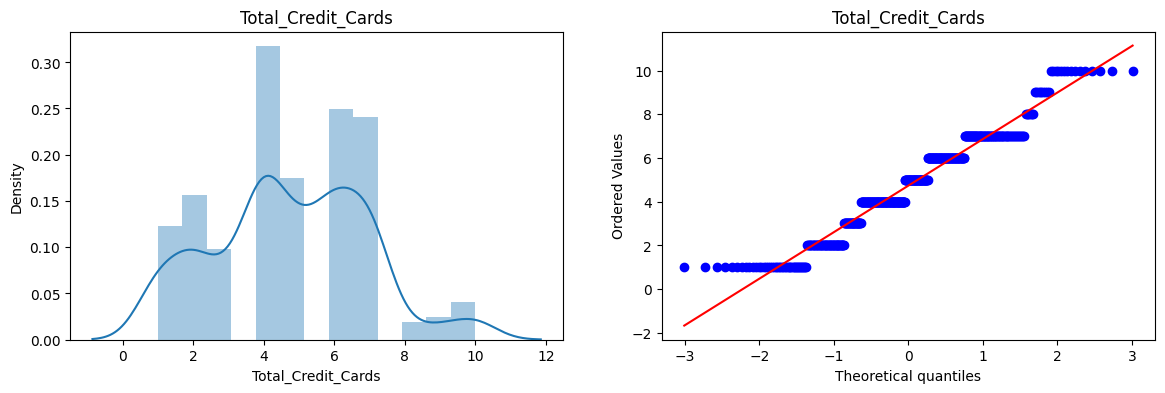

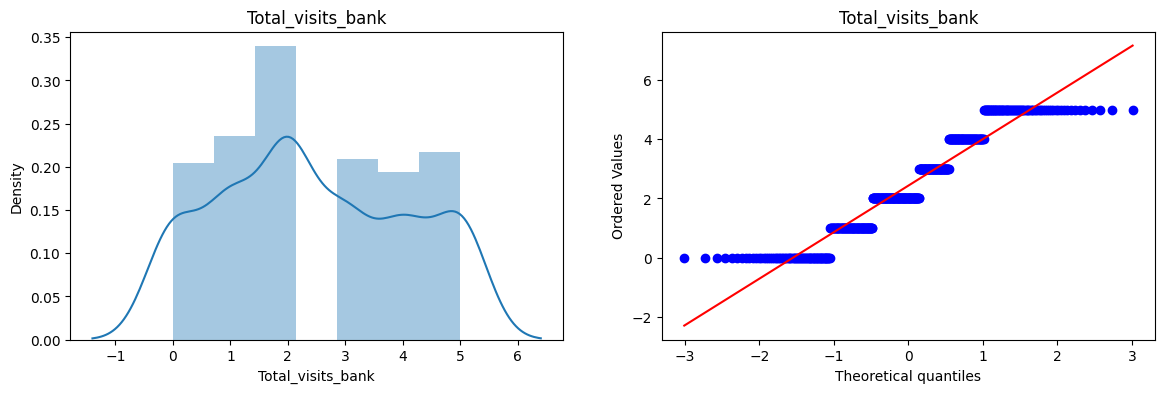

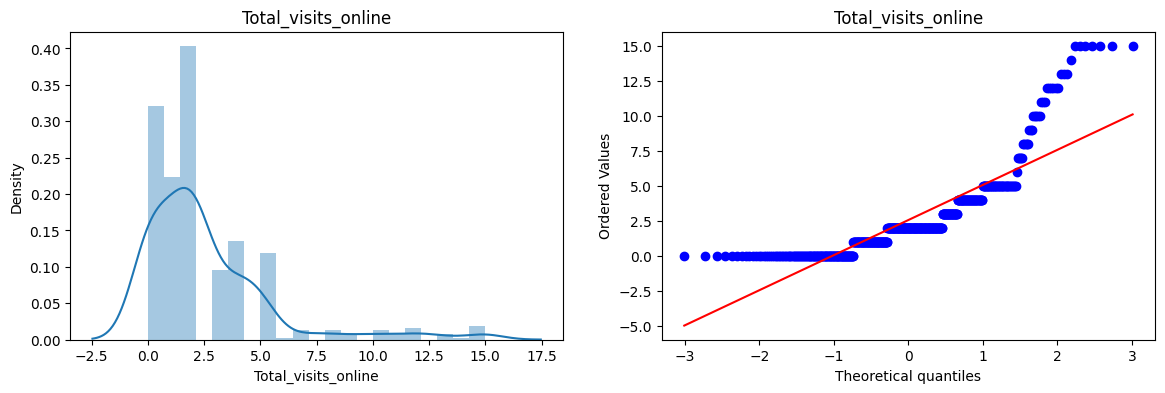

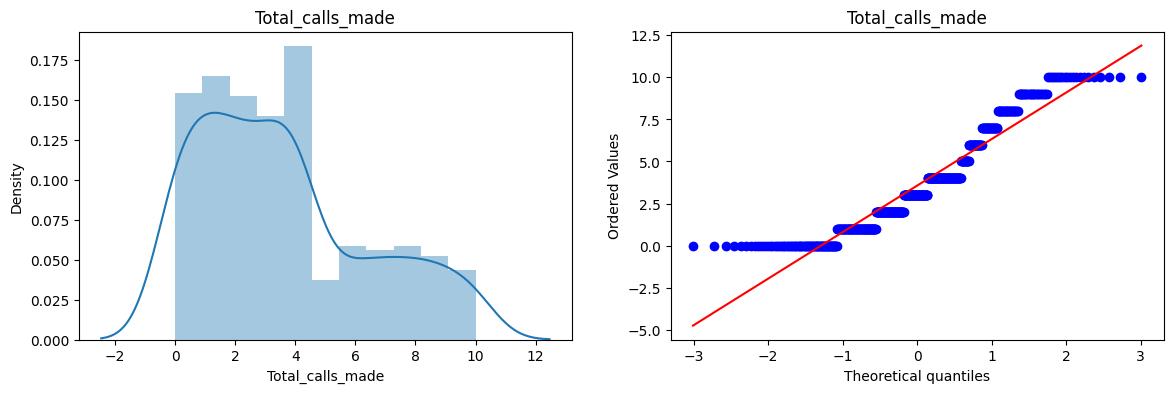

In [42]:
# this i had done for to check if the data is normally distributed or not
for cols in X_train.columns:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.distplot(X_train[cols])
    plt.title(cols)

    plt.subplot(122)
    stats.probplot(X_train[cols],dist='norm',plot = plt)
    plt.title(cols)